In [2]:
import pandas as pd
import numpy as np  
import csv

import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
import scipy.stats

In [3]:
record = pd.read_excel('record.xlsx', encoding='euc-kr')
info = pd.read_csv('player_info.csv', encoding='euc-kr')
salary = pd.read_csv('salary_by_year.csv', encoding='euc-kr')

In [4]:
record

,PLAYER_ID,PLAY_YEAR,TEAM_NAME,AGE,GP,CG,SO,GS,W,L,...,K,BK,WP,ERA,FIP,WHIP,ERA_PLUS,FIP_PLUS,WAR,WPA
0,50030,2020.0,KT,19,13,0,0,13,6,5,...,39,0,1,4.84,4.59,1.34,100.2,104.1,0.36,-0.93
1,50036,2020.0,KT,19,4,0,0,0,0,0,...,3,0,0,6.35,9.08,2.47,76.3,52.2,0.03,-0.05
2,50040,2020.0,KT,33,19,0,0,19,10,5,...,95,0,8,4.03,4.08,1.36,120.1,117.1,2.17,0.68
3,50126,2020.0,LG,19,10,0,0,8,3,2,...,37,1,3,2.47,4.12,1.26,189.8,115.7,1.83,0.75
4,50157,2020.0,LG,20,13,0,0,3,0,2,...,16,0,1,7.36,6.42,1.60,63.7,72.3,-0.31,-0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,65398,2020.0,키움,29,16,0,0,0,1,0,...,10,0,1,4.50,7.27,1.39,105.5,64.2,0.29,-0.18
4758,69640,2019.0,KIA,27,28,1,0,28,7,13,...,121,0,14,5.52,4.31,1.55,76.0,97.2,-0.52,-1.58
4759,69134,2020.0,LG,23,10,0,0,0,2,0,...,15,1,0,3.27,4.60,1.09,142.8,99.6,0.31,0.37
4760,91899,1991.0,쌍방울,23,30,1,0,16,8,6,...,37,2,3,4.97,4.36,1.63,82.6,94.0,0.89,NaN


In [5]:
print(record['PLAYER_ID'].isna().sum(axis=0))
print(record['PLAY_YEAR'].isna().sum(axis=0)) #시즌 도중 이적한 선수 확인
record.dropna(subset=['PLAY_YEAR'],axis=0, inplace=True) #시즌 전체와 중복이므로 삭제

0
164


In [6]:
# print(salary.head())
# print(salary.tail())
# print(salary.describe())
#salary.info()
salary

,id,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,50030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
1,50036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
2,50040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0
3,50054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
4,50066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,99738,NaN,NaN,2000.0,2000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2786,99742,NaN,NaN,NaN,NaN,2000.0,2400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2787,99767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2788,99810,NaN,NaN,NaN,2600.0,3600.0,5100.0,8000.0,16000.0,18500.0,...,55000.0,55000.0,60000.0,60000.0,60000.0,60000.0,40000.0,900000.0,NaN,NaN


In [7]:
salary2 = salary.copy()
salary2.dropna(how='all', axis=0, inplace=True) #연봉 전체 정보가 없는 선수 삭제
salary2

,id,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,50030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
1,50036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
2,50040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0
3,50054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
4,50066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,99738,NaN,NaN,2000.0,2000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2786,99742,NaN,NaN,NaN,NaN,2000.0,2400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2787,99767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2788,99810,NaN,NaN,NaN,2600.0,3600.0,5100.0,8000.0,16000.0,18500.0,...,55000.0,55000.0,60000.0,60000.0,60000.0,60000.0,40000.0,900000.0,NaN,NaN


In [8]:
all_df = record.merge(salary2, how='left', left_on='PLAYER_ID', right_on='id') #record와 salary 조인
all_df

,PLAYER_ID,PLAY_YEAR,TEAM_NAME,AGE,GP,CG,SO,GS,W,L,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,50030,2020.0,KT,19,13,0,0,13,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
1,50036,2020.0,KT,19,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
2,50040,2020.0,KT,33,19,0,0,19,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0
3,50126,2020.0,LG,19,10,0,0,8,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
4,50157,2020.0,LG,20,13,0,0,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,65398,2020.0,키움,29,16,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4594,69640,2019.0,KIA,27,28,1,0,28,7,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4595,69134,2020.0,LG,23,10,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4596,91899,1991.0,쌍방울,23,30,1,0,16,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# 연도에 맞는 연봉 삽입()
all_df['next_year_salary'] = ''

for r in range(4762) : #전체 행을 돌면서
    try :
        year = int(all_df['PLAY_YEAR'][r])
        #all_df.columns[34:-1] #연도 들어간 컬럼만
        for c in all_df.columns[34:-1] :
            if int(c) == (year+1) :
                all_df['next_year_salary'][r] = all_df[c][r]
    except : 
        ValueError
        #print('error')
        pass

all_df
#all_df.to_excel('final.xlsx', encoding='euc-kr', header=True, index=True)            

,PLAYER_ID,PLAY_YEAR,TEAM_NAME,AGE,GP,CG,SO,GS,W,L,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,next_year_salary
0,50030,2020.0,KT,19,13,0,0,13,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0,
1,50036,2020.0,KT,19,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0,
2,50040,2020.0,KT,33,19,0,0,19,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,
3,50126,2020.0,LG,19,10,0,0,8,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0,
4,50157,2020.0,LG,20,13,0,0,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,65398,2020.0,키움,29,16,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4594,69640,2019.0,KIA,27,28,1,0,28,7,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4595,69134,2020.0,LG,23,10,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4596,91899,1991.0,쌍방울,23,30,1,0,16,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [41]:
all_df.info()
cols = list(range(32))+[58]
new_final = all_df.iloc[:, cols]
print(new_final.columns) #필요한 행만 추출
new_final.to_excel('new_final.xlsx', encoding='euc-kr', header=True, index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4598 entries, 0 to 4597
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PLAYER_ID         4598 non-null   int64  
 1   PLAY_YEAR         4598 non-null   float64
 2   TEAM_NAME         4598 non-null   object 
 3   AGE               4598 non-null   int64  
 4   GP                4598 non-null   int64  
 5   CG                4598 non-null   int64  
 6   SO                4598 non-null   int64  
 7   GS                4598 non-null   int64  
 8   W                 4598 non-null   int64  
 9   L                 4598 non-null   int64  
 10  SV                4598 non-null   int64  
 11  HLD               4598 non-null   int64  
 12  IP                4598 non-null   float64
 13  R                 4598 non-null   int64  
 14  ER                4598 non-null   int64  
 15  BF                4598 non-null   int64  
 16  H                 4598 non-null   int64  


### 상관계수확인

In [37]:
df = pd.read_excel('new_final.xlsx', encoding='euc-kr') 
#df.set_index(df.iloc[:,0], drop=True, inplace=True)
df

SyntaxError: keyword can't be an expression (<ipython-input-37-22ec00809e6f>, line 1)

In [63]:
#df.info()
print(df['next_year_salary'].isna().sum(axis=0)) #성적->다음해 연봉 정보 없는 행 확인
df2 = df.dropna(subset=['next_year_salary'], axis=0)
X=df2.iloc[:,3:-1].values
y=df2.iloc[:,-1].values




2391


,PLAYER_ID,PLAY_YEAR,TEAM_NAME,AGE,GP,CG,SO,GS,W,L,...,K,BK,WP,ERA,FIP,WHIP,ERA_PLUS,FIP_PLUS,WAR,next_year_salary
15,60105,2017,LG,26,4,0,0,0,0,0,...,2,0,0,9.82,9.46,2.73,49.3,50.4,-0.07,900000.0
16,60105,2016,LG,25,2,0,0,0,0,0,...,1,0,0,6.35,10.85,1.06,80.1,43.7,0.05,3000.0
20,60140,2017,LG,30,63,0,0,0,3,5,...,58,0,5,5.34,4.23,1.44,90.6,115.0,-0.22,10500.0
21,60140,2018,LG,31,49,0,0,1,3,7,...,56,0,3,5.86,4.27,1.50,86.1,117.5,0.02,10500.0
22,60140,2019,"LG,한화",32,44,0,0,1,5,1,...,35,0,4,5.84,5.40,1.55,70.6,76.0,-0.57,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,99719,1999,한화,23,2,0,0,0,0,0,...,0,0,0,6.75,9.27,1.13,75.6,55.0,0.00,2100.0
4547,99719,2000,한화,24,2,0,0,0,0,0,...,1,0,0,10.13,9.53,2.63,47.0,49.9,-0.05,1700.0
4549,99738,1999,한화,23,1,0,0,0,0,0,...,0,0,0,0.00,3.27,0.00,NaN,155.9,0.04,2000.0
4551,99742,2000,한화,23,22,0,0,2,0,1,...,25,1,3,5.67,6.82,1.79,83.8,69.8,0.00,2000.0


In [27]:
corr_df = df2.corr()
corr_df

,PLAYER_ID,PLAY_YEAR,AGE,GP,CG,SO,GS,W,L,SV,...,K,BK,WP,ERA,FIP,WHIP,ERA_PLUS,FIP_PLUS,WAR,next_year_salary
PLAYER_ID,1.000000,-0.701528,0.163545,0.025186,0.068100,0.029608,-0.028796,-0.015762,0.003816,0.066947,...,-0.036973,0.005085,-0.097976,-0.018928,-0.069763,-0.019521,-0.030269,-0.001453,0.042526,-0.123427
PLAY_YEAR,-0.701528,1.000000,0.254544,0.083531,-0.113508,-0.056426,0.011399,0.043479,0.019587,0.004541,...,0.064845,-0.020754,0.104191,0.028662,0.072906,0.009000,0.028742,-0.013387,-0.034913,0.218906
AGE,0.163545,0.254544,1.000000,0.207700,-0.028521,-0.029289,0.038398,0.120687,0.093115,0.138490,...,0.110154,-0.047175,0.013124,-0.064640,-0.065980,-0.102259,0.095578,-0.006735,0.111532,0.204070
GP,0.025186,0.083531,0.207700,1.000000,0.014107,0.009860,0.013165,0.356657,0.350473,0.390773,...,0.479841,0.123619,0.339245,-0.316237,-0.316928,-0.342957,0.302633,-0.012303,0.406041,-0.030625
CG,0.068100,-0.113508,-0.028521,0.014107,1.000000,0.723711,0.488216,0.462795,0.377664,-0.047566,...,0.455503,0.106341,0.214884,-0.100478,-0.116909,-0.116683,0.080811,-0.000190,0.464005,0.029783
SO,0.029608,-0.056426,-0.029289,0.009860,0.723711,1.000000,0.374401,0.375752,0.266356,-0.042226,...,0.367518,0.102927,0.163786,-0.083137,-0.095074,-0.092447,0.084297,0.000755,0.386821,0.021606
GS,-0.028796,0.011399,0.038398,0.013165,0.488216,0.374401,1.000000,0.767063,0.766963,-0.151912,...,0.770424,0.233028,0.502374,-0.126418,-0.093539,-0.154000,0.022960,-0.013570,0.553439,0.071819
W,-0.015762,0.043479,0.120687,0.356657,0.462795,0.375752,0.767063,1.000000,0.647322,0.092795,...,0.872173,0.228598,0.483938,-0.248500,-0.233562,-0.279325,0.238168,-0.005530,0.794873,0.077737
L,0.003816,0.019587,0.093115,0.350473,0.377664,0.266356,0.766963,0.647322,1.000000,0.072914,...,0.746164,0.228805,0.543614,-0.157182,-0.150024,-0.199886,0.025414,-0.016999,0.461348,0.037359
SV,0.066947,0.004541,0.138490,0.390773,-0.047566,-0.042226,-0.151912,0.092795,0.072914,1.000000,...,0.169567,0.017421,0.016178,-0.158796,-0.202130,-0.168483,0.343572,0.014599,0.319425,-0.011608


In [71]:
# plt.figure(figsize=(20,5))
# sns.heatmap(corr_df, annot=True)
# plt.show()

In [31]:
def corrs(x) :
    if abs(x) >= 0.1 :
        return 'Yes'
    else :
        return 'No'

df3 = corr_df.applymap(lambda x : corrs(x))
df3['next_year_salary'][df3['next_year_salary']=='Yes'] #강한 상관관계를 갖는 항목 X

PLAYER_ID           Yes
PLAY_YEAR           Yes
AGE                 Yes
next_year_salary    Yes
Name: next_year_salary, dtype: object

In [32]:
abs(corr_df['next_year_salary'][3:]).sort_values(ascending=False) #아이디,연도 제외 상관계수 절대값 확인

next_year_salary    1.000000
K                   0.079429
W                   0.077737
GS                  0.071819
FIP                 0.065365
WAR                 0.062129
H                   0.059464
IP                  0.050422
HR                  0.050274
BF                  0.049553
R                   0.047395
ER                  0.046372
WP                  0.037380
L                   0.037359
GP                  0.030625
CG                  0.029783
ERA                 0.029653
B3                  0.027749
B2                  0.025270
WHIP                0.023475
SO                  0.021606
IBB                 0.021129
HBP                 0.020339
BK                  0.020324
SV                  0.011608
FIP_PLUS            0.004213
ERA_PLUS            0.004158
BB                  0.003403
HLD                 0.003230
Name: next_year_salary, dtype: float64

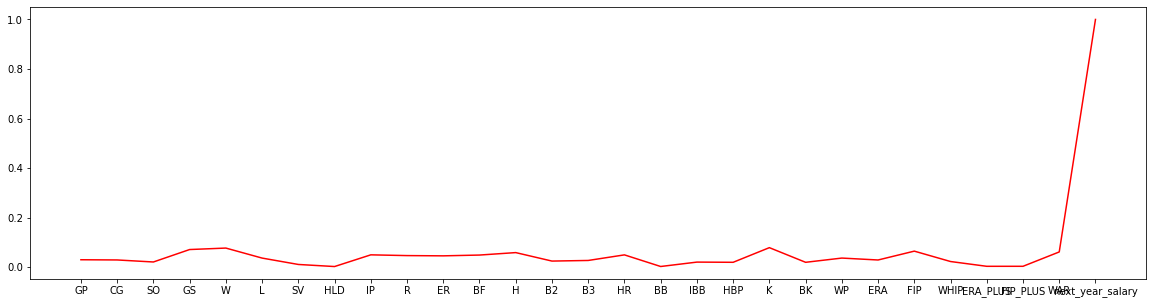

In [34]:
plt.figure(figsize=(20,5))
#sns.heatmap(corr_df, annot=True)
plt.plot(abs(corr_df['next_year_salary'][3:]), color='red')
np.array(corr_df['next_year_salary'][3:].values)
x = corr_df[3:].columns.values
y = corr_df['next_year_salary'][3:].array
#plt.annotate(corr_df['SALARY'][3:].values, (x,y))
plt.show()

In [64]:
df2['next_year_salary'] = df2['next_year_salary'].astype(int)
 # 결과값 = 상관계수, p-value
print(sp.stats.pearsonr(df2['next_year_salary'],df2['AGE']))
print(sp.stats.pearsonr(df2['next_year_salary'],df2['GS']))
print(sp.stats.pearsonr(df2['next_year_salary'],df2['IP']))
print(sp.stats.pearsonr(df2['next_year_salary'],df2['WAR']))

(0.20406987854390868, 3.540820775289146e-22)
(0.07181932443432794, 0.000734333136967381)
(0.05042187664495969, 0.017840110440514725)
(0.062129135187243216, 0.003501272821162596)


### ML

##### 히스토 그램, 박스 플롯 등으로 데이터 분포 탐색

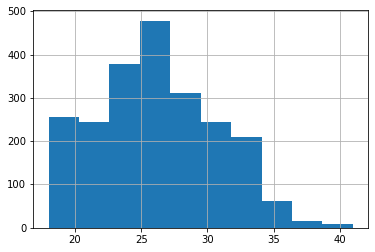

In [68]:
df2['AGE'].hist()
plt.show()

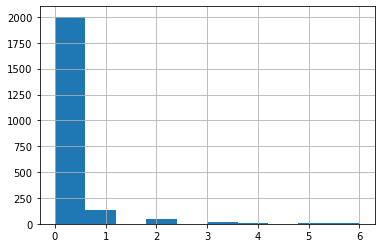

In [70]:
df2['CG'].hist()
plt.show()

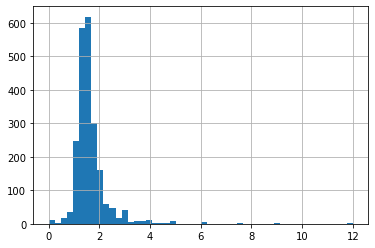

In [66]:
df2['WHIP'].hist(bins=50)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# X=df.iloc[:,3:-1].values
# y=df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(df)

df2['WHIP'].hist(bins=50)

from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=i)
knnr.fit(X_train, y_train)

predicted_y = knnr.predict(X_test)
predicted_y
(predicted_y == y_test).sum() # = 0 (분류처럼 비교하면 정확히 일치하는 값 없다)

knnr.score(X_train, y_train)
knnr.score(X_test, y_test))